<a href="https://colab.research.google.com/github/graphlit/graphlit-evals/blob/main/tonic-validate/Tonic_Validate_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os
from typing import Optional
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import os
import time
import json
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# configure shared, writable folder containing sample data
tonic_validate_directory = "/content/drive/MyDrive/Colab Notebooks/Tonic Validate"

Mounted at /content/drive


Compare Runs

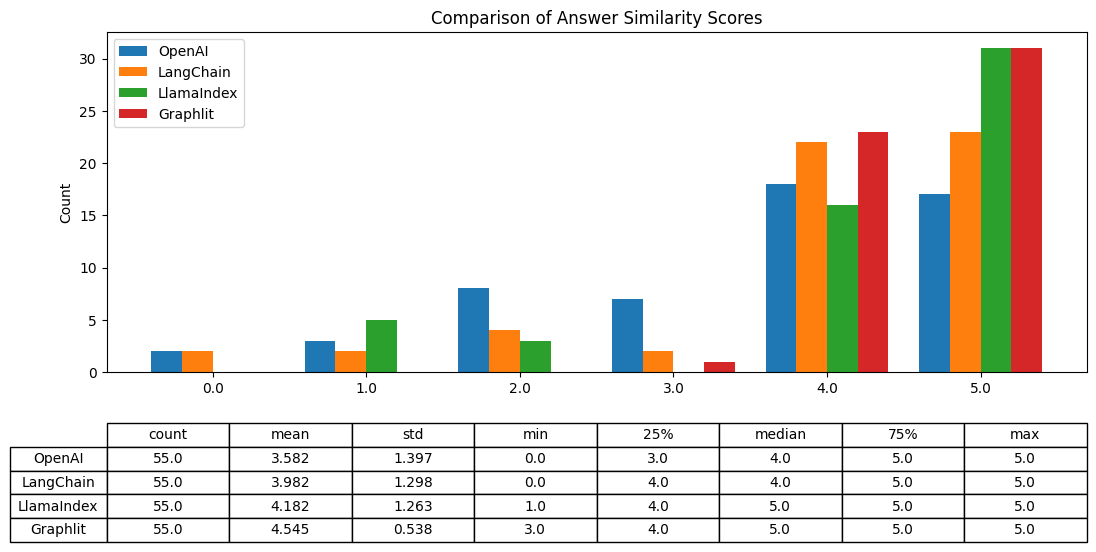

In [17]:
import matplotlib.pyplot as plt
import numpy as np

openai_run_df = pd.read_csv(f"{tonic_validate_directory}/openai_run.csv")
langchain_run_df = pd.read_csv(f"{tonic_validate_directory}/langchain_run.csv")
llamaindex_run_df = pd.read_csv(f"{tonic_validate_directory}/llamaindex_run.csv")
graphlit_run_df = pd.read_csv(f"{tonic_validate_directory}/graphlit_run.csv")

combined_scores = pd.DataFrame({
    "OpenAI": list(openai_run_df["answer_similarity"]),
    "LangChain": list(langchain_run_df["answer_similarity"]),
    "LlamaIndex": list(llamaindex_run_df["answer_similarity"]),
    "Graphlit": list(graphlit_run_df["answer_similarity"]),
})

# Unique indices across all columns
unique_indices = np.sort(np.unique(combined_scores.values.flatten()))

# Width of a bar dynamically adjusted based on number of columns
width = 0.8 / len(combined_scores.columns)

# Initialize the figure size
plt.figure(figsize=(10 + len(combined_scores.columns), 5))

# Iterate over each column in DataFrame to plot
for i, (column_name, values) in enumerate(combined_scores.items()):
    # Count the occurrences of each value and reindex
    counts = values.value_counts().reindex(unique_indices, fill_value=0)
    # Create bar for each column, offset by width * index
    plt.bar(unique_indices + i * width, counts, width, label=column_name)

# Plot customization
plt.ylabel('Count')
plt.title('Comparison of Answer Similarity Scores')
plt.xticks(unique_indices + width * len(combined_scores.columns) / 2 - width / 2, unique_indices)
plt.legend()

# Rounding the descriptive statistics to 3 significant figures
statistics_df = combined_scores.describe()
# Change 50% to 50% (median)
statistics_df = statistics_df.rename(index={'50%': 'median'})
rounded_statistics_df = statistics_df.round(3)

# Transposing the descriptive statistics table for horizontal display
rounded_statistics_df = rounded_statistics_df.T

# Adding the table below the histogram
table = plt.table(cellText=rounded_statistics_df.values,
                  colWidths=[0.1] * len(rounded_statistics_df.columns),
                  rowLabels=rounded_statistics_df.index,
                  colLabels=rounded_statistics_df.columns,
                  cellLoc='center', rowLoc='center',
                  loc='bottom', bbox=[0.0, -0.5, 1.0, 0.35])

# Adjust the space at the bottom if necessary
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.show()